In [1]:
from mlhelper import MLHelper, pd
from sklearn.datasets import load_breast_cancer

dataset = load_breast_cancer()
labels_dict = {
    0: {
        'name': 'malignant',
        'color': 'r',
        'marker': '^'
    },
    1: {
        'name': 'benign',
        'color': 'b',
        'marker': 'o'
    }
}
helper = MLHelper('Breast Cancer', labels_dict)
cancer_df = pd.DataFrame(
    data=dataset.data
    , columns=dataset.feature_names
)
cancer_df['target'] = dataset.target

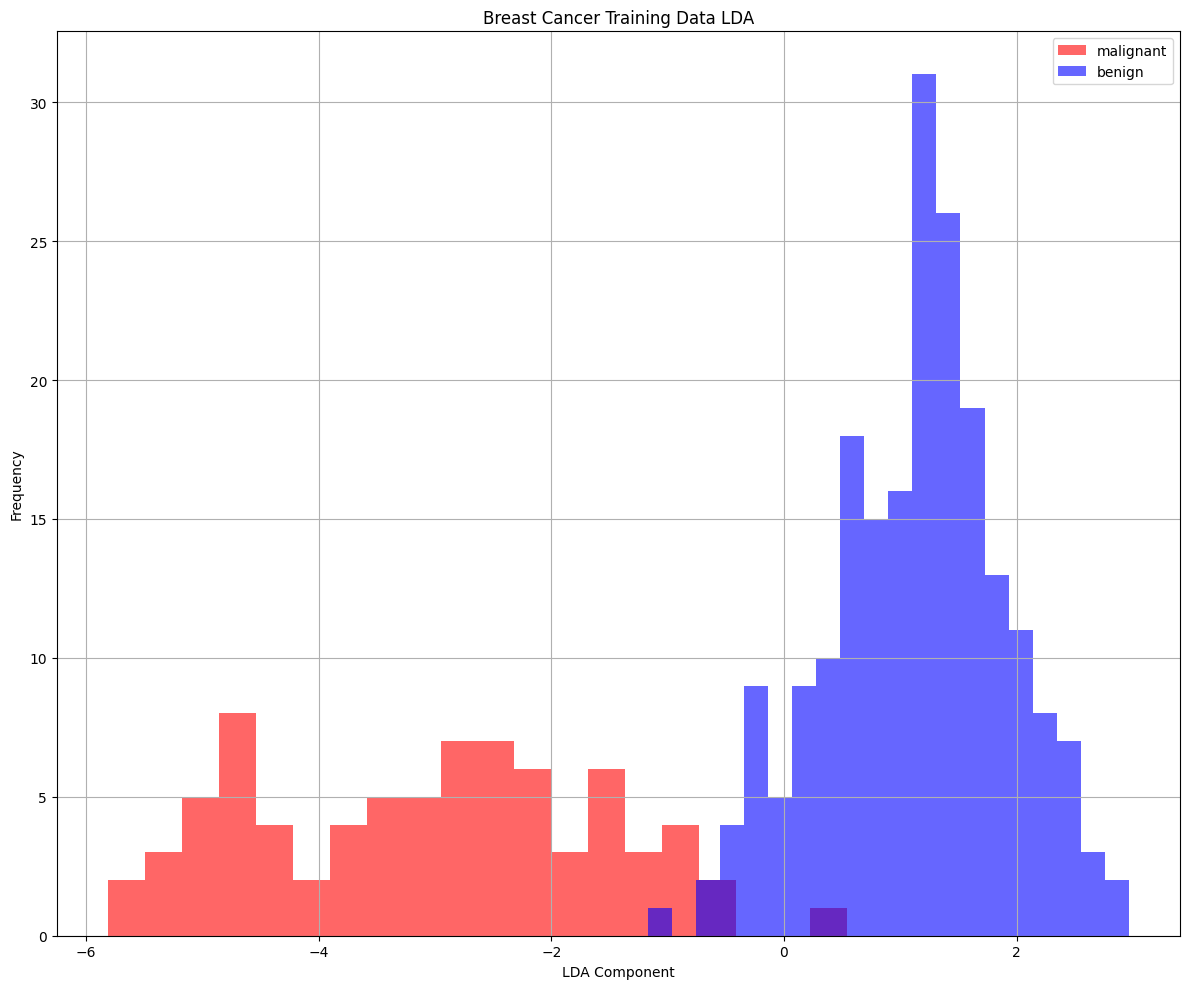

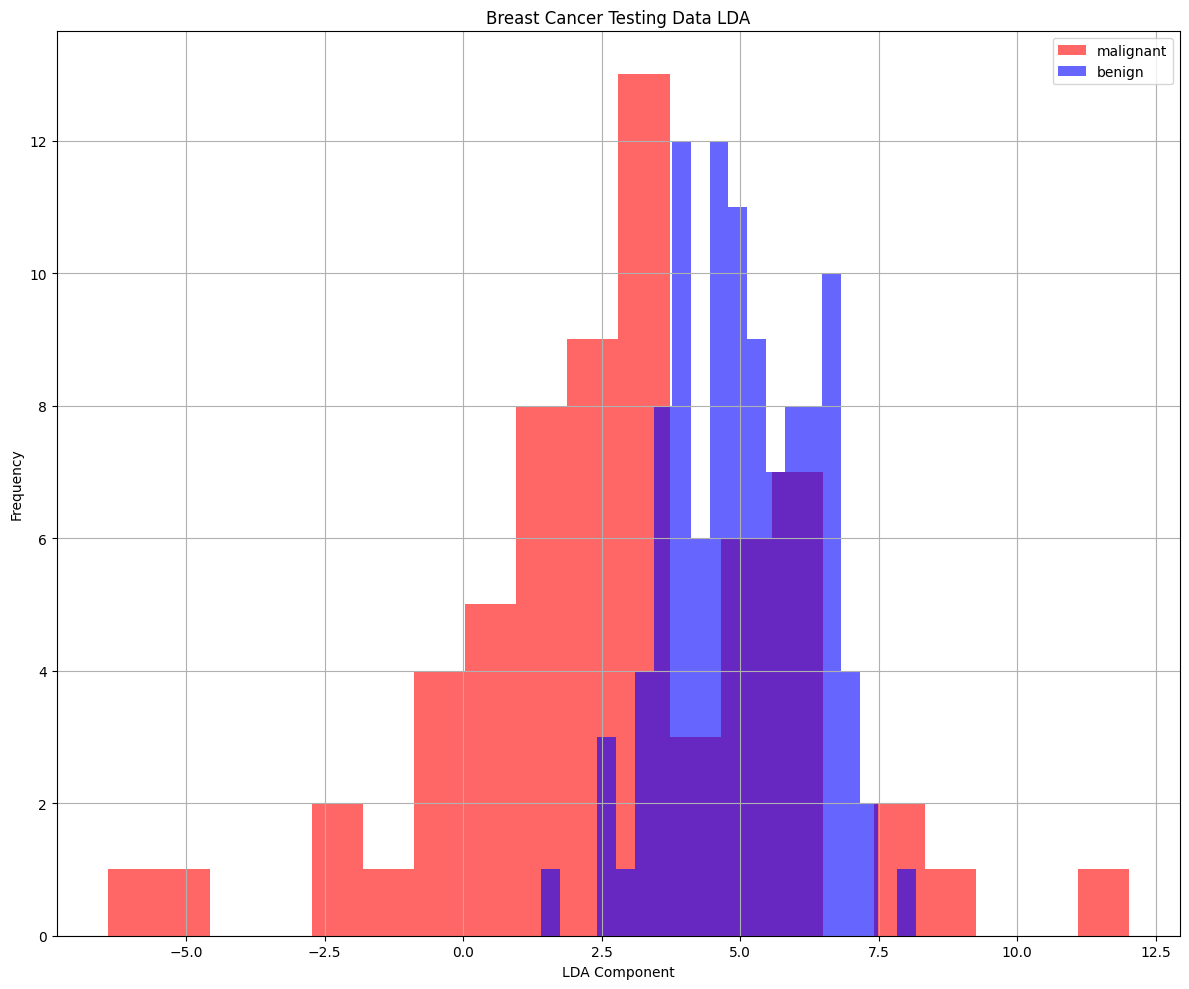

[I 2025-04-27 11:18:38,656] A new study created in memory with name: no-name-038b2e18-3560-4892-8d63-a29a6a85bcff
[I 2025-04-27 11:18:38,678] Trial 0 finished with value: 0.9825771324863883 and parameters: {'C': 4.944271297175832, 'kernel': 'rbf', 'gamma': 0.1064148876449996, 'max_iter': 762}. Best is trial 0 with value: 0.9825771324863883.
[I 2025-04-27 11:18:38,695] Trial 1 finished with value: 0.8811252268602541 and parameters: {'C': 0.0012885053792211377, 'kernel': 'linear', 'max_iter': 6503}. Best is trial 0 with value: 0.9825771324863883.
[I 2025-04-27 11:18:38,740] Trial 2 finished with value: 0.7307924984875983 and parameters: {'C': 0.0042977185540376585, 'kernel': 'rbf', 'gamma': 2.198120798018642, 'max_iter': 626}. Best is trial 0 with value: 0.9825771324863883.
[I 2025-04-27 11:18:38,752] Trial 3 finished with value: 0.9790078644888082 and parameters: {'C': 0.1641020158038567, 'kernel': 'linear', 'max_iter': 9131}. Best is trial 0 with value: 0.9825771324863883.
[I 2025-04-2

Best trial:
Accuracy: 0.9894736842105264
Best hyperparameters:  {'C': 2.890036159135059, 'kernel': 'linear', 'max_iter': 893}


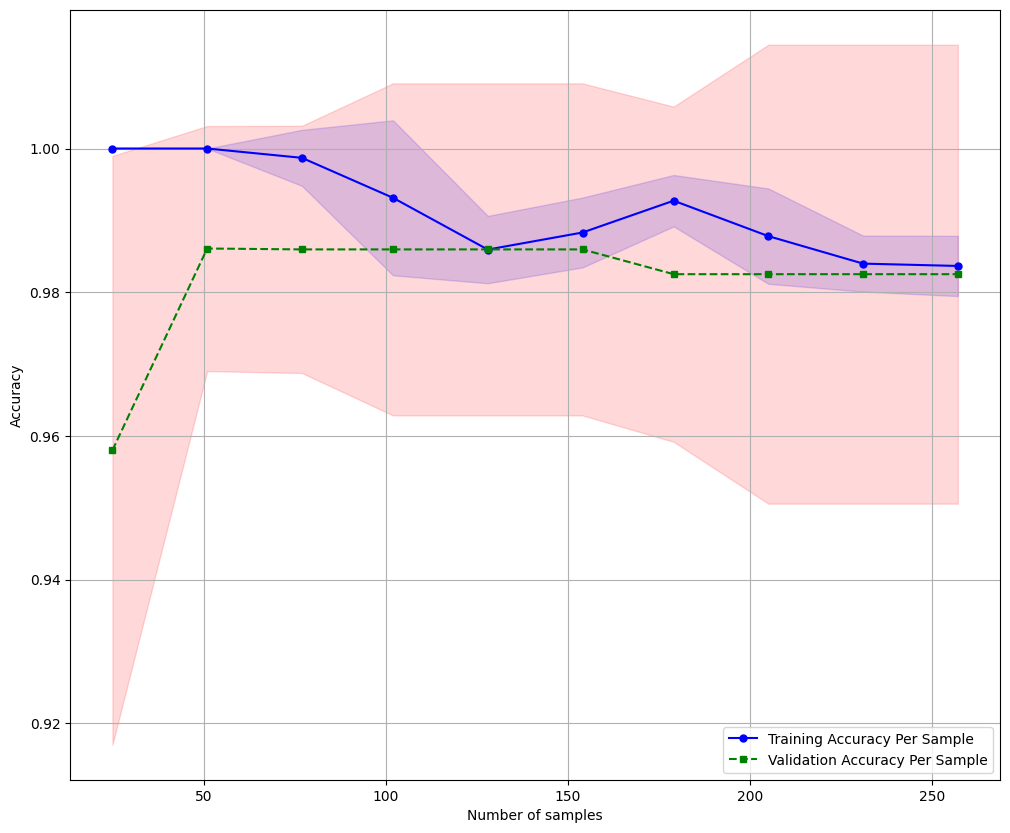

Confusion Matrix
[[  5  59]
 [  0 107]]
Accuracy: 0.6550, Precision: 0.6446, Recall: 1.0000, F1: 0.7839, AUC: 0.7810


In [2]:
X_train, X_test, y_train, y_test = helper.get_split_data(cancer_df, test_size=0.3, shuffle=True, stratify=True)
X_train_transformed = helper.get_transformed_features(X_train)
X_test_transformed = helper.get_transformed_features(X_test)
X_train_scaled, X_test_scaled = helper.get_scaled_data(X_train_transformed, X_test_transformed, y_train, y_test, 'mm')

df_train = X_train_scaled.copy()
df_train['target'] = y_train
df_train_outlier_removed = helper.remove_outliers(df_train, 'iqr', {})

X_train_feature_extracted, X_test_feature_extracted = helper.extract_features(df_train_outlier_removed.iloc[:, :-1], X_test_scaled, df_train_outlier_removed.iloc[:, -1], y_test, 'lda', {})

helper.train_and_evaluate_model('svc', X_train_feature_extracted, X_test_feature_extracted, df_train_outlier_removed.iloc[:,-1], y_test)